In [1]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
sns.set_style("dark")
sns.set_context("talk")

## Hate Speech Dataset Overview

The hate speech data that we're going to use was collected by **Davidson et al.** for their research on hate speech detection. The dataset contains tweets that are labeled as either hate speech, offensive language, or neither. 

The data were pulled from [Hatebase.org](https://www.hatebase.org/), an organization that collects instances of potential hate speech. The data were then labeled using [CrowdFlower](https://www.crowdflower.com/), which uses non-specialists to clean and label data. Each tweet was reviewed by three or more people, and a majority-wins approach was taken when there was disagreement. 

The dataset is free for anyone to download from their [GitHub page](https://github.com/t-davidson/hate-speech-and-offensive-language/tree/master/data).

### Definition of Hate Speech

People have conflicting definitions of hate speech, but for a project like this, a single definition needs to be agreed upon. For the purposes of this project, the authors defined hate speech as:

> *"Language that is used to express hatred towards a targeted group or is intended to be derogatory, to humiliate, or to insult the members of the group."*

For more information, refer to the [original research by Davidson et al.](https://aaai.org/ocs/index.php/ICWSM/ICWSM17/paper/view/15665).


# Loading the data:

In [6]:
path = r"C:\Users\xelor\Downloads\Anomaly-Detection-SocialMedia\HateSpeech\data\labeled_data.csv"
df = pd.read_csv(path, index_col=0)
df.head()

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


### Column Descriptions from the Original Authors

- **count**: Number of CrowdFlower users who coded each tweet (minimum is 3; sometimes more users coded a tweet when judgments were determined to be unreliable by CrowdFlower).
- **hate_speech**: Number of CrowdFlower users who judged the tweet to be hate speech.
- **offensive_language**: Number of CrowdFlower users who judged the tweet to be offensive.
- **neither**: Number of CrowdFlower users who judged the tweet to be neither offensive nor non-offensive.
- **class**: Class label for the majority of CrowdFlower users:
  - `0`: Hate speech  
  - `1`: Offensive language  
  - `2`: Neither
- **tweet**: The actual text of the tweet.

### Objective
Let's examine the distribution of each class label (i.e., how many tweets fall into each class).


C:\Users\xelor\AppData\Local\Temp\ipykernel_17952\712847481.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


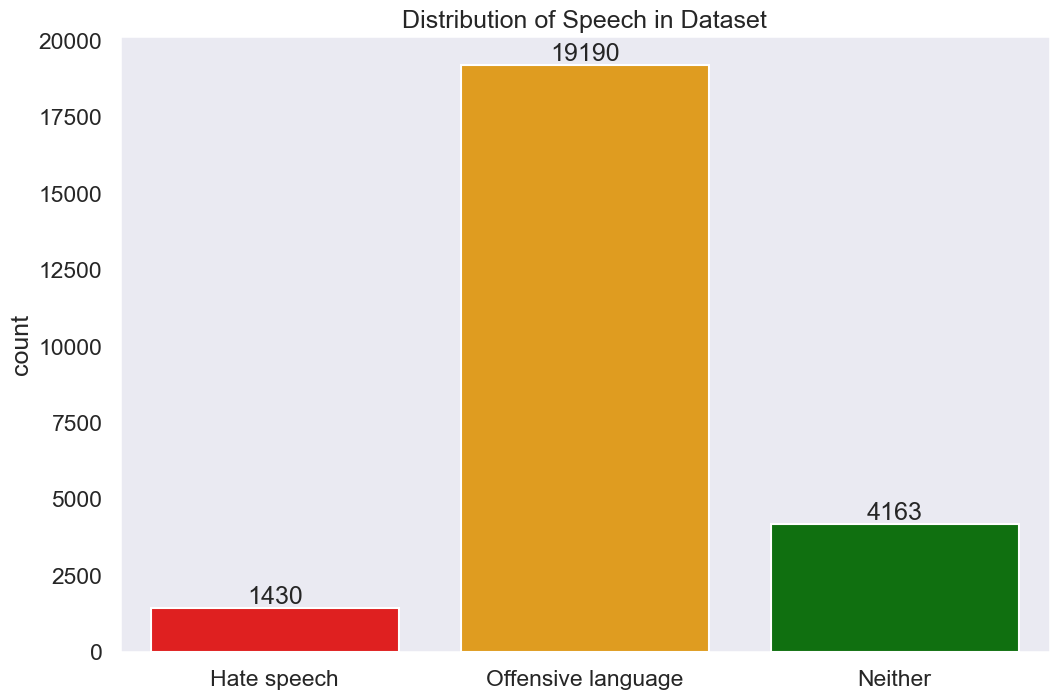

In [8]:
# Define a color palette for the classes
colors = ['red', 'orange', 'green']

plt.figure(figsize=(12, 8))
ax = sns.countplot(
    x="class", 
    data=df, 
    palette=colors  # Apply the color palette
)
plt.title('Distribution of Speech in Dataset')
plt.xlabel('')  # Don't print "class"
plt.xticks(np.arange(3), ['Hate speech', 'Offensive language', 'Neither'])

# Print the number above each bar
for p in ax.patches:
    x = p.get_bbox().get_points()[:, 0]
    y = int(p.get_bbox().get_points()[1, 1])
    ax.annotate(y, (x.mean(), y), ha='center', va='bottom')

plt.show()


### Observing the Distribution of Text Types

The dataset exhibits an unusual distribution of text types. Since all tweets were sourced from HateBase, hate speech and offensive language are significantly over-represented, as reflected in the plot above.

### Evaluating Agreement Among Coders

To analyze the level of agreement among coders, we'll check if any tweets were labeled as hate speech by at least one person and as neither by at least one other coder.


In [11]:
hate_neither = df[(df['hate_speech'] != 0) & (df['neither'] != 0)]
hate_neither.sample(20)

,count,hate_speech,offensive_language,neither,class,tweet
3910,3,2,0,1,0,"@Ken_GTH nahh , whatever you are spook or spic..."
2539,3,2,0,1,0,@Aryanliving Welcome to the movement. Anyone w...
7494,3,1,0,2,2,@whits_20 Good read -&gt; RT @WIRED: Why your ...
23188,6,3,1,2,0,"When it rains it's good ""go to the mall weathe..."
14818,3,1,0,2,2,"RT @BrentLanders6: Charlie: ""My last two songs..."
12603,3,1,0,2,2,LOL there's a talking monkey live on the inter...
6150,3,1,0,2,2,@frankthetank215 @Jim_McCloskey Fran is a hill...
25065,3,2,0,1,0,they shot another monkey lmaooooooooooo
16247,6,1,3,2,1,RT @Juicccyray: &#8220;@1stBlocJeremiah: Broke...
3550,3,1,0,2,2,@IMNOTMAKINGITUP Hey u just followed me not lo...


### Annotator Disagreement and Bayes Error

- **Observation**: There is notable disagreement among annotators, with some tweets being marked in **all categories** by different people.  
- **Implication**: This indicates a **high Bayes error**, meaning even an optimal classifier may struggle with this dataset.  
- **Baseline**: To understand this better, we can examine how many tweets received **unanimous agreement** from annotators. This provides a baseline for classifier performance.


In [12]:
all_three = df[(df['hate_speech'] != 0) & (df['neither'] != 0) & (df['offensive_language'] != 0)]
hate_offensive = df[(df['hate_speech'] != 0) & (df['offensive_language'] != 0)]
offensive_neither = df[(df['neither'] != 0) & (df['offensive_language'] != 0)]

In [13]:
all_multiple = pd.concat([hate_neither, hate_offensive, offensive_neither]).drop_duplicates()
all_multiple.sample(20)

,count,hate_speech,offensive_language,neither,class,tweet
21350,3,2,1,0,0,Smh hate that hoe
5973,3,2,1,0,0,@dantoomey2 fuck you faggot
3945,3,2,0,1,0,@KingHov1313 i got a dyke wit a child as whse ...
18946,3,1,2,0,1,RT @alexiss_11: Diii bitches &#128527;&#128158...
12130,3,2,1,0,0,Ion care fuck that hoe &#9996;&#65039;
14470,3,0,2,1,1,RT @AjalaPilgrim: &#8220;@Selecta_kerry: So wh...
5987,6,4,2,0,0,@davidly62793584 how many fuckin fags did a ev...
7073,6,2,3,1,1,@quilzel That's how rednecks eRecycle. http://...
2843,9,2,7,0,1,@CarelessOne92 I'm not Hollywood at all my nig...
18041,3,1,2,0,1,RT @TheCELEBrittany: - These porn hoes moan at...


In [16]:
unanimous = len(df) - len(all_multiple) # all annotators agreed.
disputed = len(all_multiple) / len(df)  # where annotators disagreed.

print("{:.1%} of the samples were disputed. {:.1%} were unanimous.".format(disputed, unanimous / len(df)))


29.5% of the samples were disputed. 70.5% were unanimous.


### Analysis of Agreement

This gives us an indication of the challenges in building a classifier. Even a "great" classifier will likely struggle to agree with the majority all the time, as **29.5%** of the samples had at least one dissenting opinion. While this isn't exactly **Bayes error**, it highlights that achieving a high-performing model will be difficult due to the significant disagreement in the dataset.


# Tweets in depth :

In [18]:
pd.set_option('display.max_colwidth', None)

df['tweet'].sample(20, random_state=0)

4251                             @Misplaced_Momma \nHello dare momma. I show glad dat u follow me. U lbe screamin hot in dem pitchers. \nYou eva b wit colored men?
15438                                                                                                               RT @DymondMarie1: Shoutout to your main bitch !
16926                        RT @MsKeeKee90s: Throw it up! Like a pizza! Get stirring in that pussy like a feature &#128514;&#128514;&#128514; @t_ndyy @PamiiBabesh
4399                                                                                                    @Nien_Nunb what did you search? Gay redneck episode 1 play?
4380                                                                                                                             @Ncoleycole u still a mutt tho lol
4998                                                                                  @Taylor_Simonee you have your nips pierced too ?! &#127806;&#128064;&#127806;
17363      RT @Q

# Cleaning data:

In [19]:
url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
        '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
mention_regex = '@[\w\-]+'
emoji_regex = '&#\d*;'
amp_regex = '&amp;'

In [20]:
text = df['tweet'].sample(20)
text

2375                                                                                          @2LEGIT4that Lmao &#9995; Excuse me bitch?I am not Soundcloud
9941                       Has anyone ever purchased baseball field dirt? I really want dirt from @Yankees Stadium for my grandfather's grave. #weirdtweets
6851          @megynkelly \nI don't understand the need for multiple autopsies. I guess they're going to keep on until they can slant 1 against the officer
4816                                                                                         @SeymourBlanco you were supposed to hang w me this week nigger
19898                                                                                                 RT @krisinizu: I'm telling you, shaved pussy is ugly.
876                                       #porn,#android,#iphone,#ipad,#sex,#xxx, | #Anal | Anal gaping tranny play panty nylon part http://t.co/35oTesnwmx
1221                                                      &#8220

In [22]:
# Define the cleaning functions using the regex patterns
def clean_tweet(tweet):
    tweet = re.sub(url_regex, '', tweet)        # Remove URLs
    tweet = re.sub(mention_regex, '', tweet)    # Remove mentions
    tweet = re.sub(emoji_regex, '', tweet)      # Remove emojis
    tweet = re.sub(amp_regex, '', tweet)        # Remove HTML ampersand entities
    return tweet

In [23]:
df['clean'] = df['tweet'].apply(clean_tweet)

In [24]:
df['clean'].sample(20, random_state=0)

4251                       \nHello dare momma. I show glad dat u follow me. U lbe screamin hot in dem pitchers. \nYou eva b wit colored men?
15438                                                                                                     RT : Shoutout to your main bitch !
16926                                                           RT : Throw it up! Like a pizza! Get stirring in that pussy like a feature   
4399                                                                                        what did you search? Gay redneck episode 1 play?
4380                                                                                                                  u still a mutt tho lol
4998                                                                                                      you have your nips pierced too ?! 
17363                                      RT : : When you accidentally say "About a week ago" #8221; bitch u just wanted to show Ya ass smh
6795      and

In [26]:
df.to_csv('C:\\Users\\xelor\\Downloads\\Anomaly-Detection-SocialMedia\\HateSpeech\\data\\clean.csv')